#**EDA ON  NETFLIX**

In [ ]:
#PYTHON LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Kaggle'

**Loading The Data**

In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d shivamb/netflix-shows

netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip && rm *.zip


Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Kaggle/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**Data Preprocessing**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
# type column have only 2 kind of values so we will convert it into category datatype
df['type'] = df['type'].astype('category')
df['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

In [ ]:
# date_added should be in date
df['date_added'] = df['date_added'].astype('datetime64')
df.dtypes['date_added']

dtype('<M8[ns]')

In [ ]:
# checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#**Handing Missing values**

In [ ]:
# 2634 show director and 825 cast are missing we can't do anything for missing values so we are dropping it
df.drop(columns={'director','cast'}, inplace=True)
# df.drop(columns=['director','cast'], inplace=True)

In [ ]:
# country have 831 missing values so we will fill them using maximum occered country (mode)
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [ ]:
# date_added column have 10 missing values so we are taking dataframe from those in which values are present in it
# basically we are dropin those in which date_added is missing(using just another way via notna() method)
df=df[df['date_added'].notna()]

In [ ]:
# 4 rating are missing so we will fill them using maximum occering value  which is mode
df['rating'].fillna(df['rating'].value_counts().index[0], inplace=True)

In [ ]:
# 3 values are missing in duration
df[df['duration'].isna()]             # we can see that duration values are placaed in rating

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[[5541,5794,5813],'duration'] = df.loc[[5541,5794,5813]]['rating'].values   # filled with rating column values

In [ ]:
df.loc[[5541,5794,5813],'rating'] = [np.NaN,np.NaN,np.NaN]                         # filled rating column with nan

In [ ]:
df.loc[[5541,5794,5813]]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# 3 rating are Nan because of above code so we will fill them using maximum occering value  which is mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   category      
 2   title         8797 non-null   object        
 3   country       8797 non-null   object        
 4   date_added    8797 non-null   datetime64[ns]
 5   release_year  8797 non-null   int64         
 6   rating        8797 non-null   object        
 7   duration      8797 non-null   object        
 8   listed_in     8797 non-null   object        
 9   description   8797 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(7)
memory usage: 954.0+ KB


#**Checking for duplicates**

In [ ]:
# checking entire row is duplicating or not
df.duplicated().sum()

0

In [ ]:
# Checking shows are duplicating or not
df['title'].duplicated().sum()

0

In [ ]:
df[df['title'].duplicated()]               # they are not movies so we will drop them and thier original movie aslo

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# droing duplicated and wrong values from dataframe
df.drop(df[df['title'].duplicated(keep=False)].index, inplace=True)
df['title'].duplicated().sum()                                           # after dropping, check

0

#**Feature engineering**

In [ ]:
df['month_added'] = df['date_added'].apply(lambda x: x.strftime("%B"))

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.year)

In [ ]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
# creating new feature
df['targeted_age'] = df['rating'].replace(rating_ages)

In [ ]:
df['targeted_age'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
# there are only 4 unique category of targeted_age so we will convert it into category
df['targeted_age'] = df['targeted_age'].astype('category')

In country coumn there are more than one county, maybe they are thier subsidiary country so we keep the first only

In [ ]:
df['country'] = df['country'].apply(lambda x : x.split(',')[0])

Droping redundant column

In [ ]:
df.drop(columns=['rating'], inplace=True)

In [ ]:
df.sample(2)

,show_id,type,title,country,date_added,release_year,duration,listed_in,description,month_added,year_added,targeted_age
132,s133,TV Show,Brave Animated Series,United States,2021-09-01,2021,1 Season,"International TV Shows, TV Action & Adventure,...",A group of superheroes sets out to rid the wor...,September,2021,Adults
7216,s7217,Movie,KL Zombi,Malaysia,2017-08-21,2013,92 min,"Comedies, Horror Movies, International Movies",A field hockey-playing pizza delivery boy find...,August,2017,Teens


#**Conclusion from cleaning**

- All Movies have duration in min
- All Tv Show have duration in season

In [ ]:
# checking durations
df[df['type']=='TV Show']['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [ ]:
# we are removing excess part in duration and converting it into numeric
df['duration'] = df['duration'].apply(lambda x: x.split(' ')[0])
df['duration'] = df['duration'].astype('int')

- First we create two dataframe one for movies and othe for TV Show

*Creating dataframe for type 'Movie'*

In [ ]:
Movie_df = df[df['type']=='Movie']

In [ ]:
# renaming column name duration to duration_min
Movie_df.rename(columns = {'duration':'duration_min'}, inplace = True)
Movie_df.sample()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,show_id,type,title,country,date_added,release_year,duration_min,listed_in,description,month_added,year_added,targeted_age
2259,s2260,Movie,The Long Dumb Road,United States,2020-07-08,2018,91,"Comedies, Independent Movies","Bound for art school, a sheltered student gets...",July,2020,Adults


*Creating new dataframe for type 'TV Show'*

In [ ]:
TV_Show_df = df[df['type']=='TV Show']

In [ ]:
# Changing column name to duration to season
TV_Show_df.rename(columns = {'duration':'season'}, inplace = True)
TV_Show_df.sample()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,show_id,type,title,country,date_added,release_year,season,listed_in,description,month_added,year_added,targeted_age
4604,s4605,TV Show,Strong,United States,2018-10-01,2016,1,Reality TV,Gabrielle Reece hosts a transformative competi...,October,2018,Teens


#**Univariate Analysis**

We will follow this order by column wise for univariate analysis
- Categorical
- Numerical

*Type*

In [ ]:
df['type'].shape[0]

8797

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

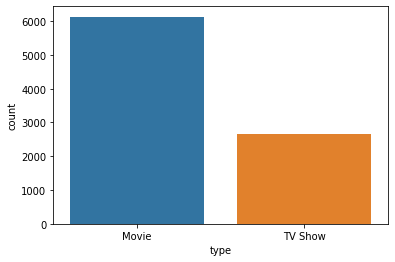

In [ ]:
sns.countplot(x=df['type'])
plt.show()

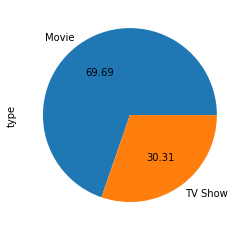

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

*out of 8791 there are 6127 Movies and TV shows are 2664*

*nearly 70 percent are movies and 30 percent are TV Shows*

**Targated_age**

In [ ]:
df['targeted_age'].count()

8797

In [ ]:
df['targeted_age'].value_counts()

Adults        4096
Teens         2647
Older Kids    1487
Kids           567
Name: targeted_age, dtype: int64

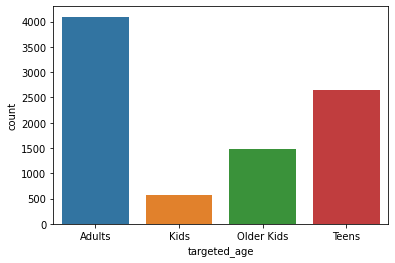

In [ ]:
sns.countplot(x=df['targeted_age'])
plt.show()

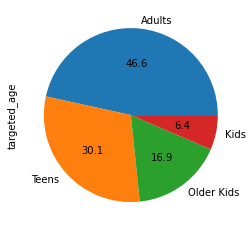

In [ ]:
df['targeted_age'].value_counts().plot(kind='pie', autopct='%.1f')
plt.show()

- there are 8791 movies and out of that Adult movies are maxium which 4091
- 47 percent movies are adult movies

**release_year**

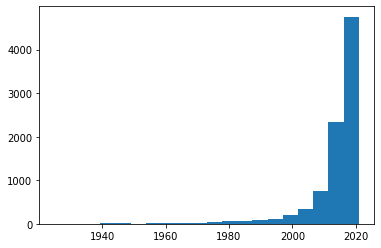

In [ ]:
plt.hist(df['release_year'], bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


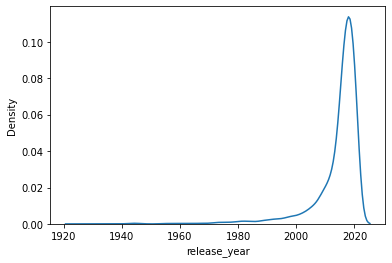

In [ ]:
sns.distplot(df['release_year'], hist=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


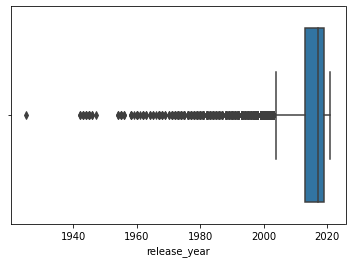

In [ ]:
sns.boxplot(df['release_year'])
plt.show()

In [ ]:
df['release_year'].describe()

count    8797.000000
mean     2014.183472
std         8.822191
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

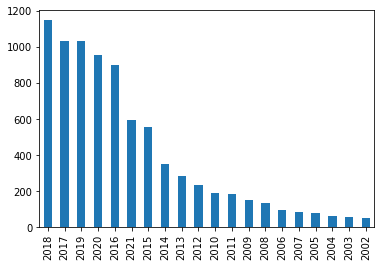

In [ ]:
# top 20 release year in which maximun movie released
df['release_year'].value_counts().head(20).plot(kind='bar')

- Maximum movies are released in 2018
- Total movies released before 2017 are equal to total movies released 2017 to 2021

**Duration**
- There are two different type of durations for Movies it's in miniutes and for TV Shows it's in season
- **first we will see about duration which is in duration_min from Movie_df**

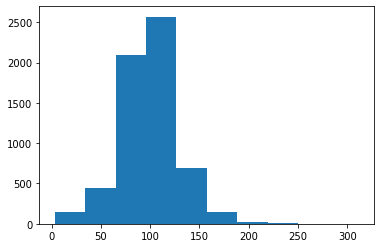

In [ ]:
plt.hist(Movie_df['duration_min'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


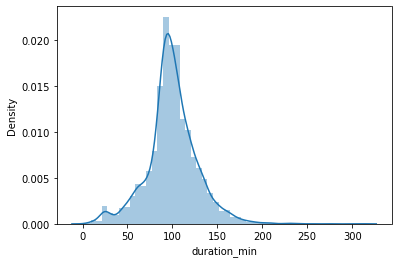

In [ ]:
sns.distplot(Movie_df['duration_min'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


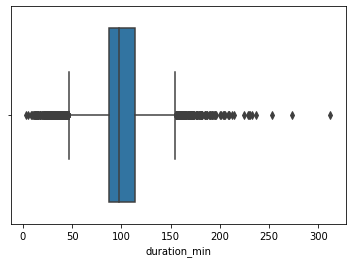

In [ ]:
sns.boxplot(Movie_df['duration_min'])
plt.show()

In [ ]:
Movie_df['duration_min'].describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

- The average movie time is 100 mins
-  maximum movies are in the range of 87 to 114 minutes
-  we can see that there are sevral movies which are less than 50 mins so we can consider them outlier

**Now we will see about duration which is in the form of season form TV_Show_df**

(array([2.214e+03, 2.920e+02, 6.400e+01, 5.600e+01, 1.700e+01, 1.500e+01,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <a list of 10 Patch objects>)

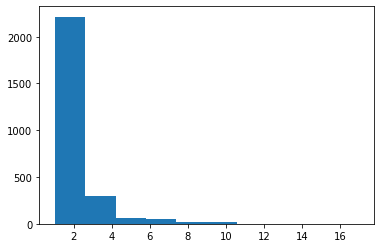

In [ ]:
plt.hist(TV_Show_df['season'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


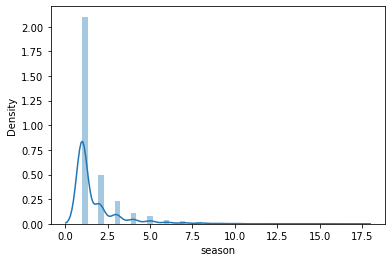

In [ ]:
sns.distplot(TV_Show_df['season'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


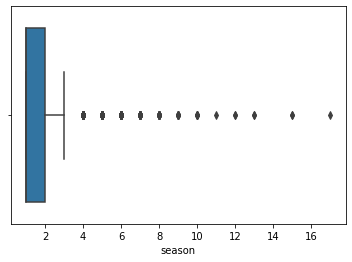

In [ ]:
sns.boxplot(TV_Show_df['season'])

In [ ]:
TV_Show_df['season'].describe()

count    2666.000000
mean        1.751313
std         1.550176
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: season, dtype: float64

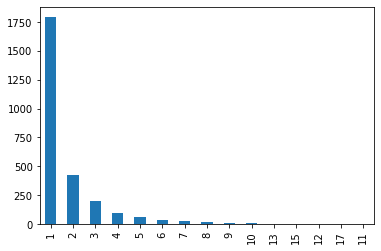

In [ ]:
TV_Show_df['season'].value_counts().plot(kind='bar')

In [ ]:
TV_Show_df[TV_Show_df['season']>15]

,show_id,type,title,country,date_added,release_year,season,listed_in,description,month_added,year_added,targeted_age
548,s549,TV Show,Grey's Anatomy,United States,2021-07-03,2020,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,July,2021,Teens


- There are total 2664 TV Shows
-  Nearly 1800 TV Shows have only one season
-  There is one TV show who have maximun 17 seasons

**Year_added**

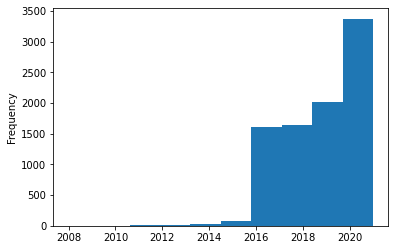

In [ ]:
df['year_added'].plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


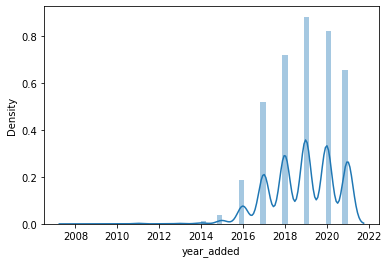

In [ ]:
sns.distplot(df['year_added'])

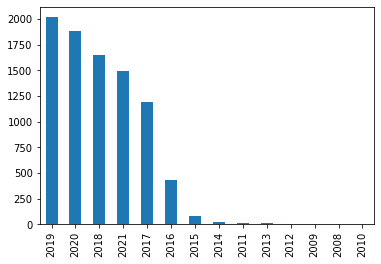

In [ ]:
df['year_added'].value_counts().plot(kind='bar')

-  After 2017 Movies and Tv Shows added maximum
 in 2019 nearly 2000 Movies and TV Shows are added

# Bivariate and Multivariate Analysis
We will follow this order to do bivariate and multivariate analysis
- Numerical - Numerical
- Numerical - Categorical
- Categorical - Categorical

**(release_year ) (duration - type)**

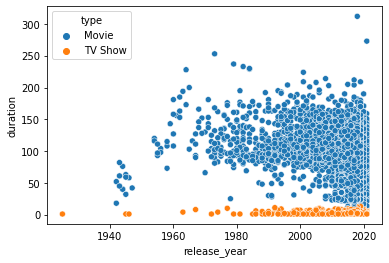

In [ ]:
sns.scatterplot(x=df['release_year'], y=df['duration'], hue=df['type'])

- Here only one thing we can understand that as year increases the no of movie ans show releases more

**(targeted_age) (duration_min)**

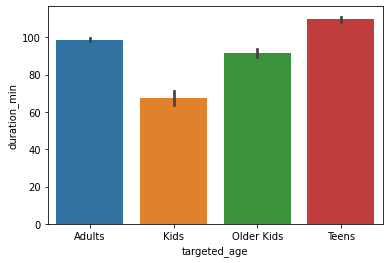

In [ ]:
sns.barplot(x=Movie_df['targeted_age'], y=Movie_df['duration_min'])

-  The kid's movies are small relatively others
- The teens movies are large in duration relatively other

**(targeted_age) (type)**


type,Movie,TV Show
targeted_age,,
Adults,71.90,28.10
Kids,52.56,47.44
Older Kids,65.30,34.70
Teens,72.42,27.58


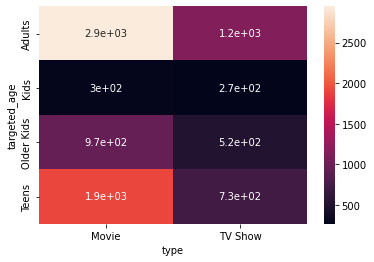

In [ ]:
sns.heatmap(pd.crosstab(df['targeted_age'], df['type']), annot=True)
pd.crosstab(df['targeted_age'], df['type']).apply(lambda x: round((x/x.sum())*100,2), axis=1)

- In Adult 72% are movies and 28% TV Show so we can understand that adult prefer to watch movie rather than TV Shows
-  Kids are neutral, ther are equal no of Movies and Tv Shows for them
- There are 65% movies and 35% Tv shows for targetd older kids
- In Teens 72% are movies and 28% TV Show so we can understand that Tenns also prefer to watch movie rather than TV Shows

**(month_added) (year_added) (no of show_id)**

In [ ]:
df.pivot_table(index='month_added', columns='year_added', values='show_id', aggfunc='count')

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
April,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0
August,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
December,NaN,NaN,NaN,NaN,1.0,2.0,6.0,21.0,96.0,118.0,185.0,215.0,169.0,NaN
February,1.0,NaN,NaN,NaN,1.0,NaN,2.0,4.0,15.0,82.0,87.0,148.0,114.0,109.0
January,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,43.0,72.0,129.0,153.0,205.0,132.0
July,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
March,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,17.0,125.0,173.0,172.0,137.0,112.0
May,NaN,1.0,NaN,1.0,NaN,NaN,NaN,6.0,13.0,86.0,97.0,139.0,157.0,132.0


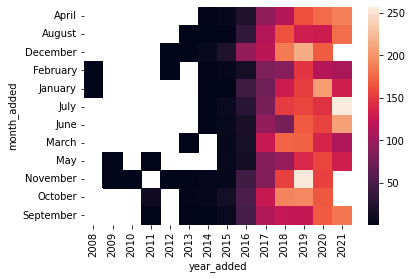

In [ ]:
sns.heatmap(df.pivot_table(index='month_added', columns='year_added', values='show_id', aggfunc='count'))

-  After 2016 maximum movies are added in Netflix

**pair plot with all other numerical column and (type) categorical column**

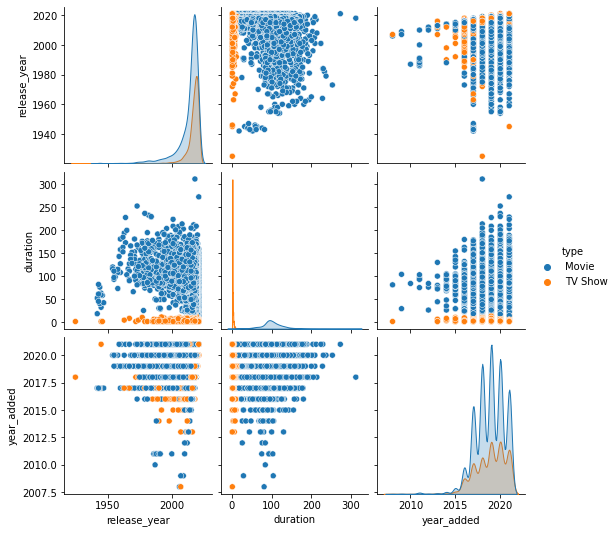

In [ ]:
sns.pairplot(df, hue='type')

**(release_year) and (count of show_id)**

In [ ]:
new = df.groupby('release_year')['show_id'].count().reset_index()
new.head()

,release_year,show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4


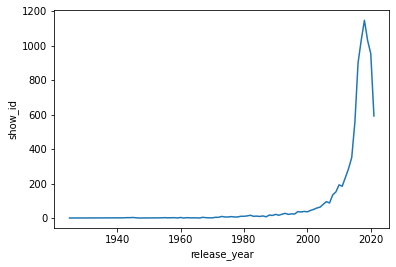

In [ ]:
sns.lineplot(x=new['release_year'],y=new['show_id'])

- After 2000 the movies and Tv shows released more

# Conclusion

- Out of 8791 there are 6127 Movies and TV shows are 2664
- Nearly 70 percent are movies and 30 percent are TV Shows
- There are 8791 movies and out of that Adult movies are maximum which 4091
- 47% movies are adult movies
- Maximum movies are released in 2018
- Total movies released before 2017 are equal to total movies released between 2017 to 2021
- There are two different type of time durations for Movies it's in miniutes and for TV Shows it's in season
- The average movie time is 100 mins
- Maximum movies are in the range of 87 to 114 minutes
- We can see that there are sevral movies which are less than 50 mins so we need to think more on that
- There are total 2664 TV Shows
- Nearly 1800 TV Shows have only one season
- There is one TV show who have maximun 17 seasons that's name is Grey's Anatomy
- After 2017 Movies and Tv Shows added maximum
- In single year 2019 nearly 2000 Movies and TV Shows are added which is maximun overall
- The kid's movies are small relatively others nearly 60-70 minutes
- The teen's movies are large in duration relatively other nearly 120 minutes
- In Adult 72% are movies and 28% TV Show so we can conclude that adult prefer to watch movie rather than TV Shows
- There are equal no of Movies and Tv Shows for them
- There are 65% movies and 35% Tv shows for targetd older kids
- In Teens 72% are movies and 28% TV Show so we can conclude that Tenns also prefer to watch movie rather than TV Shows
- After 2016 maximum movies are added in Netflix
- After 2000 the movies and Tv shows released more